

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:


### Dataset Description 

This dataset collects information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up
for their appointment. A number of characteristics about the patient are
included in each row.  ‘ScheduledDay’ tells us on
what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 


### Question(s) for Analysis;
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


In [2]:
!pip install --upgrade pandas==0.25.0



    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01   54% |█████████████████▍              | 5.7MB 29.4MB/s eta 0:00:01    80% |█████████████████████████▊      | 8.4MB 27.3MB/s eta 0:00:01    93% |█████████████████████████████▉  | 9.8MB 28.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.0MB/s eta 0:00:01  9% |███▏                            | 1.3MB 24.9MB/s eta 0:00:01    19% |██████▏                         | 2.6MB 22.8MB/s eta 0:00:01    28% |█████████                       | 3.8MB 24.8MB/s eta 0:00:01    38% |████████████▎                   | 5.1MB 28.8MB/s eta 0:00:01    88% |████████████████████████████▎   | 11.8MB 23.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninst

<a id='wrangling'></a>
## Data Wrangling

In This section i start loading the data and Take a look on using the Data frame of pandas.
Check Data type of each column
Check missing values
Check duplicate values
Check every individual Columns (valid, accurate, concise)
Check the relation between columns




In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', sep= ',')
















In [4]:
df.shape 



(110527, 14)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing value

In [6]:
df.duplicated().sum()

0

There is no duplicated 

In [7]:
df[['PatientId','No-show']].nunique() 

PatientId    62299
No-show          2
dtype: int64

There is 62299 nom duplicated patients id

In [8]:
df['PatientId'].duplicated().sum()


48228

In [9]:
df.duplicated(['PatientId', 'No-show']).sum()

38710

There is 38710 patient with the same id and same result of show 

In [10]:
df.apply(lambda x: x.nunique())

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

useing apply method to check every unique value of each columns.



In [11]:
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

The average age of patients are 37 years
almost 2 frpm 100 hand hypertension and 1 from 100 had diabets
There is a 0.3 of patients recieved sms very small number
max age is 115 



issues to deal with:1/ min age
2/ drop dublicated values of patient id 
3/drop AppointmentID/ ScheduledDay/AppointmentDay/Scholarship
4/fix the spell of hyptertension




### Data Cleaning
>> While Data wrangling i could figure that there is PatientId dublicated values need to be removed.

> I will not need AppointmentID,ScheduledDay and Alcoholism in my data anylsis so i'm gonna drop them.
> Minimum age is -1 .

>The misspeling of hypertension 

> I'm gonna mergeing Diabetic, hypertension and handcap in one column to make it easier in data analysis "chronic Diseases".

> Creat a new columns of appear and absent.







In [12]:
df.drop_duplicates(subset=['PatientId'], keep='first', inplace=True )



drop the duplicated values of paientId while keeping the first result occurs in data.

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62299 entries, 0 to 110524
Data columns (total 14 columns):
PatientId         62299 non-null float64
AppointmentID     62299 non-null int64
Gender            62299 non-null object
ScheduledDay      62299 non-null object
AppointmentDay    62299 non-null object
Age               62299 non-null int64
Neighbourhood     62299 non-null object
Scholarship       62299 non-null int64
Hipertension      62299 non-null int64
Diabetes          62299 non-null int64
Alcoholism        62299 non-null int64
Handcap           62299 non-null int64
SMS_received      62299 non-null int64
No-show           62299 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 7.1+ MB


In [14]:
df.drop(['AppointmentID','ScheduledDay','AppointmentDay','Alcoholism'], axis=1, inplace=True)


removing the columns which would have no use in data analysis


In [15]:
print(df.query("Age =='-1'"))

          PatientId Gender  Age Neighbourhood  Scholarship  Hipertension  \
99832  4.659432e+14      F   -1         ROMÃO            0             0   

       Diabetes  Handcap  SMS_received No-show  
99832         0        0             0      No  


using query to find the -1 in Age

In [16]:
df.drop(index=99832,inplace=True)

In [17]:
print(df.describe())

          PatientId           Age   Scholarship  Hipertension      Diabetes  \
count  6.229800e+04  62298.000000  62298.000000  62298.000000  62298.000000   
mean   1.471660e+14     36.705496      0.092908      0.196507      0.070885   
std    2.549080e+14     23.531076      0.290306      0.397360      0.256635   
min    3.921784e+04      0.000000      0.000000      0.000000      0.000000   
25%    4.176935e+12     17.000000      0.000000      0.000000      0.000000   
50%    3.198294e+13     36.000000      0.000000      0.000000      0.000000   
75%    9.484763e+13     56.000000      0.000000      0.000000      0.000000   
max    9.999816e+14    115.000000      1.000000      1.000000      1.000000   

            Handcap  SMS_received  
count  62298.000000  62298.000000  
mean       0.020113      0.327362  
std        0.155058      0.469254  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  


In [18]:
print(df.head())




      PatientId Gender  Age      Neighbourhood  Scholarship  Hipertension  \
0  2.987250e+13      F   62    JARDIM DA PENHA            0             1   
1  5.589978e+14      M   56    JARDIM DA PENHA            0             0   
2  4.262962e+12      F   62      MATA DA PRAIA            0             0   
3  8.679512e+11      F    8  PONTAL DE CAMBURI            0             0   
4  8.841186e+12      F   56    JARDIM DA PENHA            0             1   

   Diabetes  Handcap  SMS_received No-show  
0         0        0             0      No  
1         0        0             0      No  
2         0        0             0      No  
3         0        0             0      No  
4         1        0             0      No  


In [19]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)


In [20]:
df.rename(columns={'No-show':'No_show'}, inplace=True)


In [21]:
appear = np.where(df['No_show'] == "No", True, False)
absent = np.where(df['No_show'] == "Yes", True, False)




In [22]:
df_appear = df[appear]
df_absent = df[absent]

In [23]:

print(df.head())


      PatientId Gender  Age      Neighbourhood  Scholarship  Hypertension  \
0  2.987250e+13      F   62    JARDIM DA PENHA            0             1   
1  5.589978e+14      M   56    JARDIM DA PENHA            0             0   
2  4.262962e+12      F   62      MATA DA PRAIA            0             0   
3  8.679512e+11      F    8  PONTAL DE CAMBURI            0             0   
4  8.841186e+12      F   56    JARDIM DA PENHA            0             1   

   Diabetes  Handcap  SMS_received No_show  
0         0        0             0      No  
1         0        0             0      No  
2         0        0             0      No  
3         0        0             0      No  
4         1        0             0      No  


In [24]:
df['Chronic_Diseases'] = df[['Hypertension', 'Handcap', 'Diabetes']].any(axis=1).astype(int)

creat a new column of Chronic Diseases, combine the values of Hypertension and handcap and diabetes in new column of chronic diseases



In [25]:
df['No_show'].value_counts()

No     50105
Yes    12193
Name: No_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
>>> Is there a correlation between certain demographic factor of gender  has a predication of a no-show appointment?
>>> Peope with Scholarship more likely to appear or absent?

>>> does people who recieved sms attend more than people who dosen't?

>>>does gender and chronic disesaes together affect the show ?









In [63]:
df['No_show'] = df['No_show'].map({'No': 1, 'Yes': 0})

The no_show was appear in yes and no makes erorr while finding the correlation so iby using map i change it to 0 and 1 

In [64]:
print(df.head())

      PatientId Gender  Age      Neighbourhood  Scholarship  Hypertension  \
0  2.987250e+13      F   62    JARDIM DA PENHA            0             1   
1  5.589978e+14      M   56    JARDIM DA PENHA            0             0   
2  4.262962e+12      F   62      MATA DA PRAIA            0             0   
3  8.679512e+11      F    8  PONTAL DE CAMBURI            0             0   
4  8.841186e+12      F   56    JARDIM DA PENHA            0             1   

   Diabetes  Handcap  SMS_received  No_show  Chronic_Diseases  
0         0        0             0      NaN                 1  
1         0        0             0      NaN                 0  
2         0        0             0      NaN                 0  
3         0        0             0      NaN                 0  
4         1        0             0      NaN                 1  


In [65]:
def plot_appearance_effect(df, column_name):
    
    plt.figure(figsize=[20,10])
    df[column_name][appear].hist(alpha=0.5, bins=20, color='red', label='Appear')
    df[column_name][absent].hist(alpha=0.5, bins=20, color='blue', label='Absent')
    plt.legend()
    plt.title('{} effect on attendance'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Total Patients')



build a function to avoid Repetition of code.

most appearance occurs in the infants between the age of 20 to 40 people more likely to absent compearin to other ages and older more likely to appear

visulazie columns


## the gender 


In [28]:
df['Gender'].value_counts()

F    40045
M    22253
Name: Gender, dtype: int64

In [29]:
df_appear['Gender'].value_counts()

F    32217
M    17888
Name: Gender, dtype: int64

32217 female has show at the time of appointment
17888 male has show at the time of appointment


In [30]:
df_absent['Gender'].value_counts()

F    7828
M    4365
Name: Gender, dtype: int64

7828 females absent the appointment 
 4365 males absent the appointment

In [31]:
32217 / 40045 *100


80.45199150955176

In [32]:
17888 / 22253 * 100

80.38466723587831

about 80% of females will show in the appoinment time
and 80% of male patients will show at the appoinment time 
 concusion gender has no real effect on predication p.s these values after removing the duplicated patients id and keeping the first value appears but even without removing the dublicated the differnces cant tell a predication 


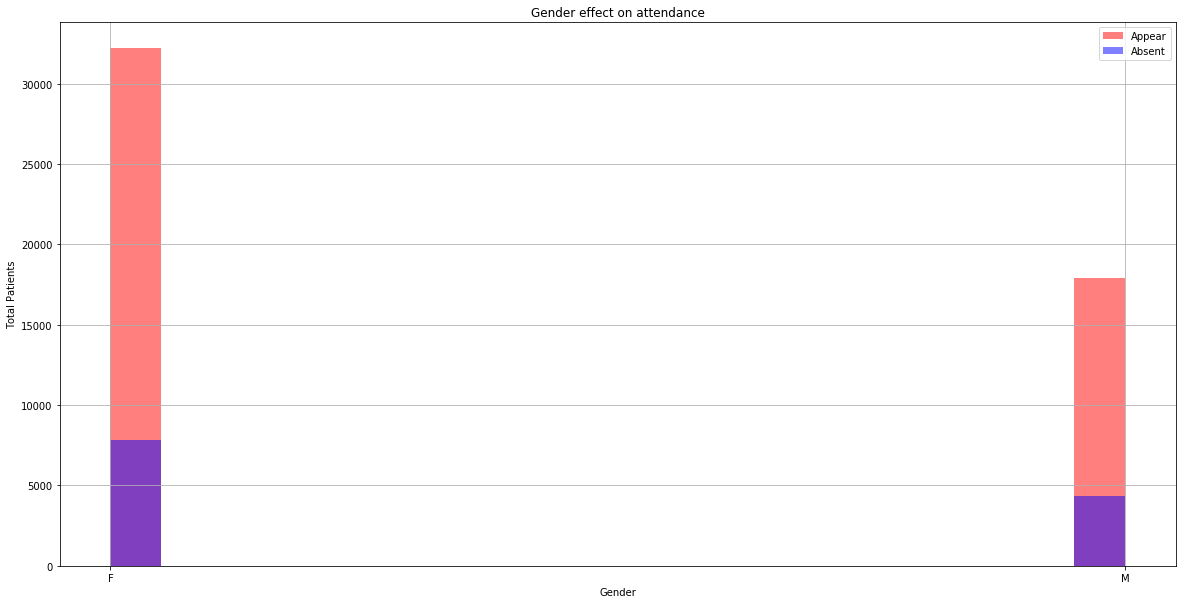

In [68]:
plot_appearance_effect(df, 'Gender')

The paient who received sms and show in time alost half the paients who received sms and noshow

Does SMS_receive affects appperance of paients?

In [87]:
df['SMS_received'].value_counts()

0    41904
1    20394
Name: SMS_received, dtype: int64

there is 41904 did not receive any sms
while 20394 receive them 

In [88]:
df_appear['SMS_received'].value_counts()

0    35202
1    14903
Name: SMS_received, dtype: int64

35202 has appear in the time of appointment while not recieve sms
14903 has appear and recieve sms

In [89]:
df_absent['SMS_received'].value_counts()

0    6702
1    5491
Name: SMS_received, dtype: int64

6702 absent and not recieve sms
5491 absent and receive sms 

In [90]:
14903 / 20394  *100

73.07541433755026

In [91]:
35202/41904*100

84.00630011454754

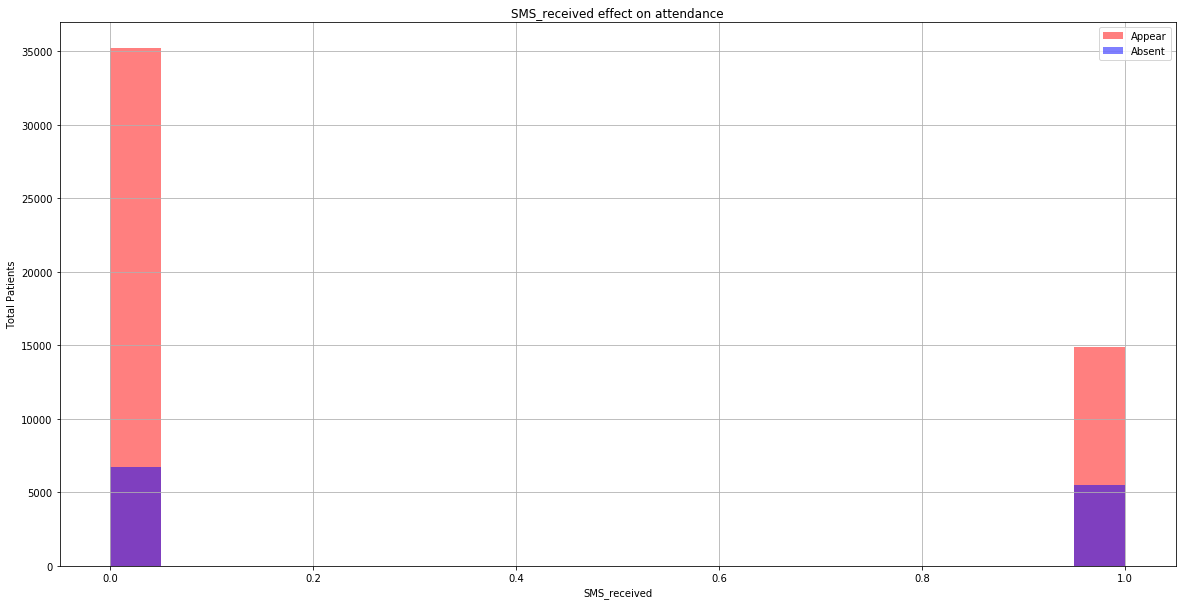

In [69]:
plot_appearance_effect(df, 'SMS_received')

More than half the paients did not receive a sms 
and for paients how receive sms 73% has appear at the time of appointment 


does people with chronic disease more likey to appear ?

In [185]:
print(df.head())


      PatientId Gender  Age      Neighbourhood  Scholarship  Hypertension  \
0  2.987250e+13      F   62    JARDIM DA PENHA            0             1   
1  5.589978e+14      M   56    JARDIM DA PENHA            0             0   
2  4.262962e+12      F   62      MATA DA PRAIA            0             0   
3  8.679512e+11      F    8  PONTAL DE CAMBURI            0             0   
4  8.841186e+12      F   56    JARDIM DA PENHA            0             1   

   Diabetes  Handcap  SMS_received  No_show  Chronic_Diseases  
0         0        0             0        1                 1  
1         0        0             0        1                 0  
2         0        0             0        1                 0  
3         0        0             0        1                 0  
4         1        0             0        1                 1  


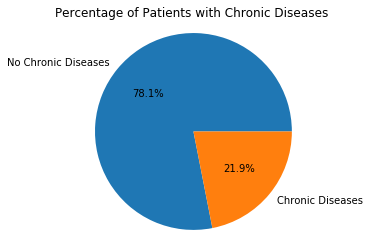

In [186]:
#percenthe of people with chronic disease to people who have not
chronic_diseases_counts = df['Chronic_Diseases'].value_counts()
plt.pie(chronic_diseases_counts, labels=['No Chronic Diseases', 'Chronic Diseases'], autopct='%.1f%%')
plt.axis('equal')
plt.title('Percentage of Patients with Chronic Diseases ')
plt.show()

In [187]:
df['Chronic_Diseases'].value_counts()


0    48645
1    13653
Name: Chronic_Diseases, dtype: int64

In [188]:
df.Chronic_Diseases[appear].value_counts()

0    38740
1    11365
Name: Chronic_Diseases, dtype: int64

In [189]:
df.Chronic_Diseases[absent].value_counts()

0    9905
1    2288
Name: Chronic_Diseases, dtype: int64

In [190]:
11365/13653 *100

83.24177836372958

In [191]:
38740/48645 *100

79.63819508685374

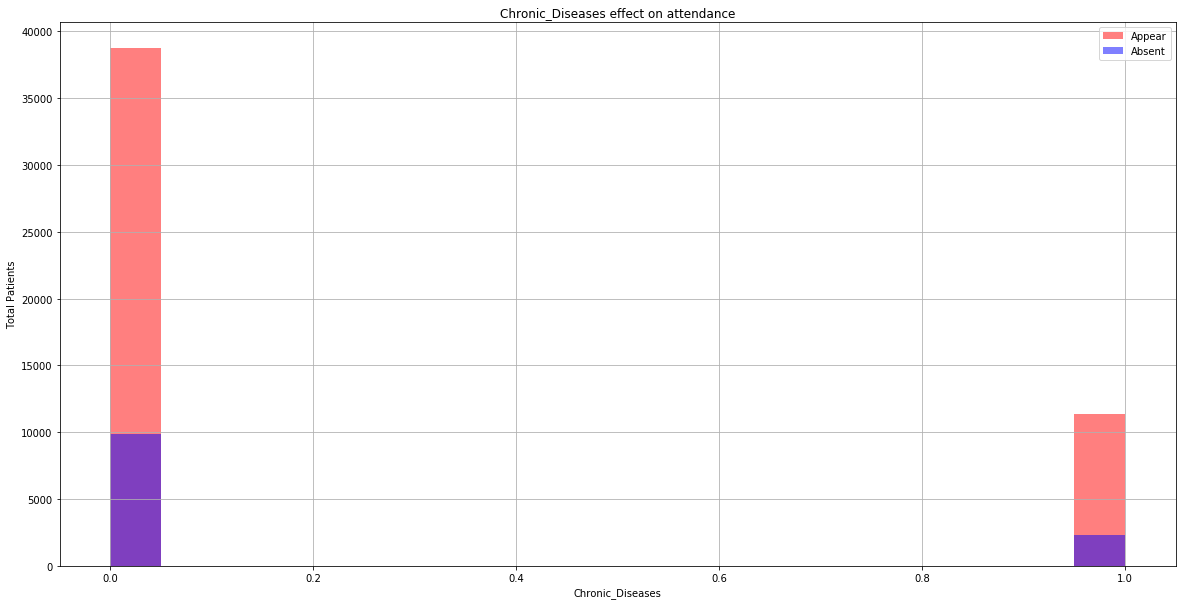

In [71]:
plot_appearance_effect(df, 'Chronic_Diseases')

83% of paients with chronic disease shows at appointment time 
while in paients without any chronic disease about 79% will show

doses gender and chornic disease both show differants ?

In [82]:
df['Gender_Chronic_Diseases'] = df[['Gender', 'Chronic_Diseases']].apply(lambda x: '{}_{}'.format(x[0], x[1]), axis=1)
df['Gender_Chronic_Diseases'].value_counts()

F_0    30704
M_0    17941
F_1     9341
M_1     4312
Name: Gender_Chronic_Diseases, dtype: int64

In [83]:
df['Gender_Chronic_Diseases'].value_counts()

F_0    30704
M_0    17941
F_1     9341
M_1     4312
Name: Gender_Chronic_Diseases, dtype: int64

In [85]:
df.Gender_Chronic_Diseases[appear].value_counts()

F_0    24441
M_0    14299
F_1     7776
M_1     3589
Name: Gender_Chronic_Diseases, dtype: int64

Making a new column of both gender demographaic and paients with chronic diseases 

In [86]:
df.Gender_Chronic_Diseases[absent].value_counts()

F_0    6263
M_0    3642
F_1    1565
M_1     723
Name: Gender_Chronic_Diseases, dtype: int64

In [197]:
#the female paients with chornic diseases who appears
7776/9341*100

83.24590514934161

In [198]:
#the male paients with chornic diseases who appears
3589/4312*100

83.23283858998145

In [199]:
#the female paients without chornic diseases who appears
24441/ 30704*100


79.6020062532569

In [200]:
#the male paients without chornic diseases who appears
14299/17941*100


79.70012819798228

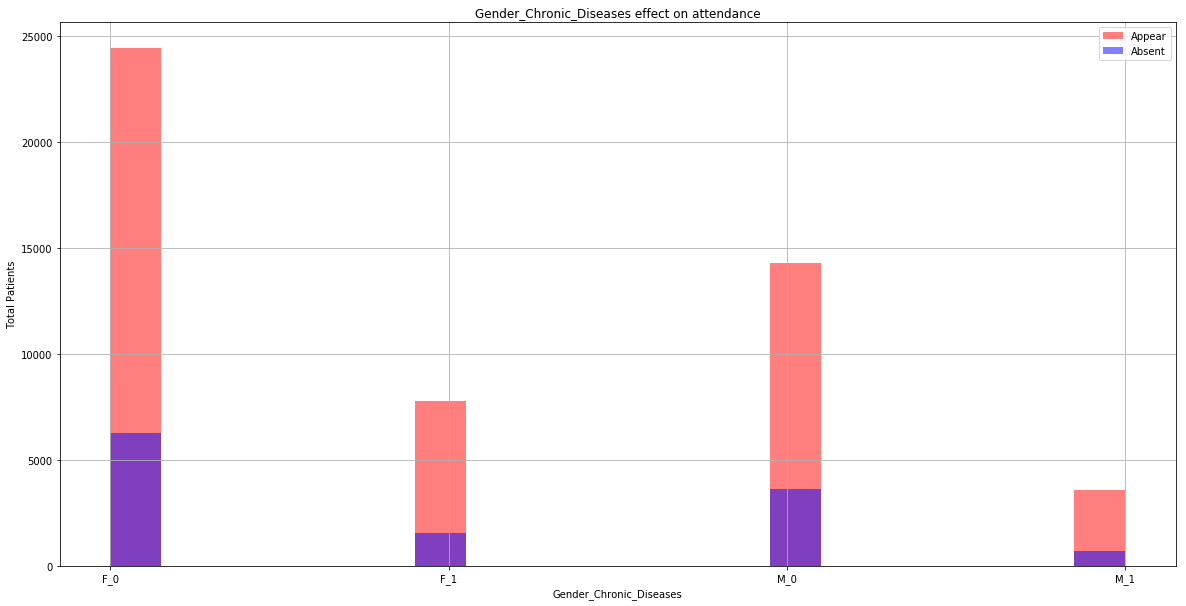

In [87]:
plot_appearance_effect(df, 'Gender_Chronic_Diseases')

Peope with Scholarship more likely to appear or absent?

In [202]:
scholarship_counts = df['Scholarship'].value_counts()

In [203]:
scholarship_counts

0    56510
1     5788
Name: Scholarship, dtype: int64

56510 has No Scholarship while 5788 has Scholarship

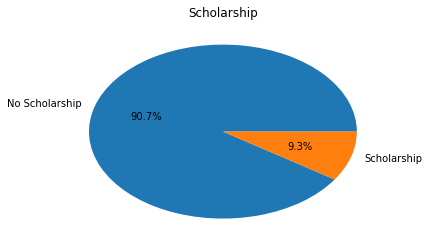

In [204]:
labels = ['No Scholarship', 'Scholarship']
plt.pie(scholarship_counts, labels=labels, autopct='%1.1f%%')
plt.title('Scholarship')
plt.show()

In [205]:
df.Scholarship[appear].value_counts()

0    45624
1     4481
Name: Scholarship, dtype: int64

In [206]:
df.Scholarship[absent].value_counts()

0    10886
1     1307
Name: Scholarship, dtype: int64

People who appears at the show without Scholarship

In [207]:
45624/ 56510*100

80.73615289329322

People who appears at the show with Scholarship

In [208]:
4481/5788*100

77.41879751209399

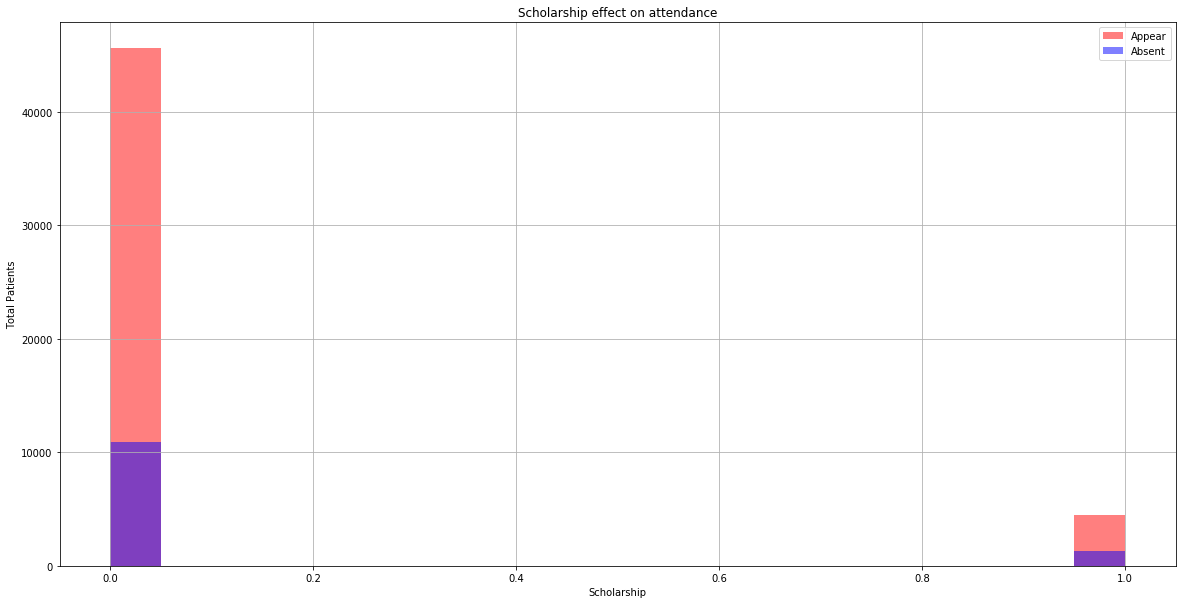

In [74]:
plot_appearance_effect(df, 'Scholarship')

People With a Scholarship more likely to absent at the appointment comparing to the people without Scholarship

<a id='conclusions'></a>
## Conclusions

First i ask question about the demographic effects on the attendence and i figure that Gender has no predication in show or no-show as the value almost the same.

More than half the paients did not receive a sms and for paients how receive sms 73% has appear at the time of appointment while 84% of people who didn't receive sms has show.
people with chornic diseases"hypertension/Diabetes and/or Handcaped more likely to show.
Gender with chronic diseases dosen't affect the appearance but both with chornic disease more likely to show.
People With a Scholarship more likely to absent at the appointment comparing to the people without Scholarship.





## limitations:
I have droped the dublications of paient-id but kept the first occurnace whatever the value and other value be.
The AppointmentID , ScheduledDay, AppointmentDay ,Alcoholism all these columns i had drop thinking it has no effect
on my anlysis.
Drop all row of the age value of -1


In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0